In [34]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk


In [3]:

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('News _dataset/Fake.csv').sample(5000, random_state=23)
true_data = pd.read_csv('News _dataset/True.csv').sample(5000,random_state=23)

In [6]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['title', 'text']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

,title,text,subject,date
10574,nsc fulfill subpoena request susan rice unmask...,judicial watch today announced national securi...,politics,"Jun 20, 2017"
486,donald trump looking build trump tower moscow...,would aware contacts highranking lowerlevel tr...,News,"August 28, 2017"
11054,obamas bags cash trump discovers 300 million s...,remember stories bags cash given president kar...,politics,"Apr 25, 2017"
19880,florida doctor fire running tv offering medica...,woman say agree doctor theory would vote hilla...,left-news,"Oct 3, 2016"
17500,watch swamp monster james clapper make false c...,watch fake news swamp creature jailformer dire...,left-news,"Dec 18, 2017"


In [37]:
true_data = pd.read_csv('News _dataset/True.csv').sample(5000,random_state=23)

In [38]:
true_data = clean_dataframe(true_data)

In [9]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['title', 'text']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
print(len(corpus))

10000


In [10]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)

C:\Users\najee\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [42]:
true_corpus = build_corpus(true_data)        
print(len(true_corpus))

10000


In [12]:
model.save("word2vecmodel")

In [44]:
model_true = word2vec.Word2Vec(true_corpus, size=90, window=15, min_count=100, workers=4)

C:\Users\najee\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [45]:
model_true.save("word2vecmodel_true")

In [32]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i], y[i]),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')
        if i >100:
            break
    plt.show()

C:\Users\najee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


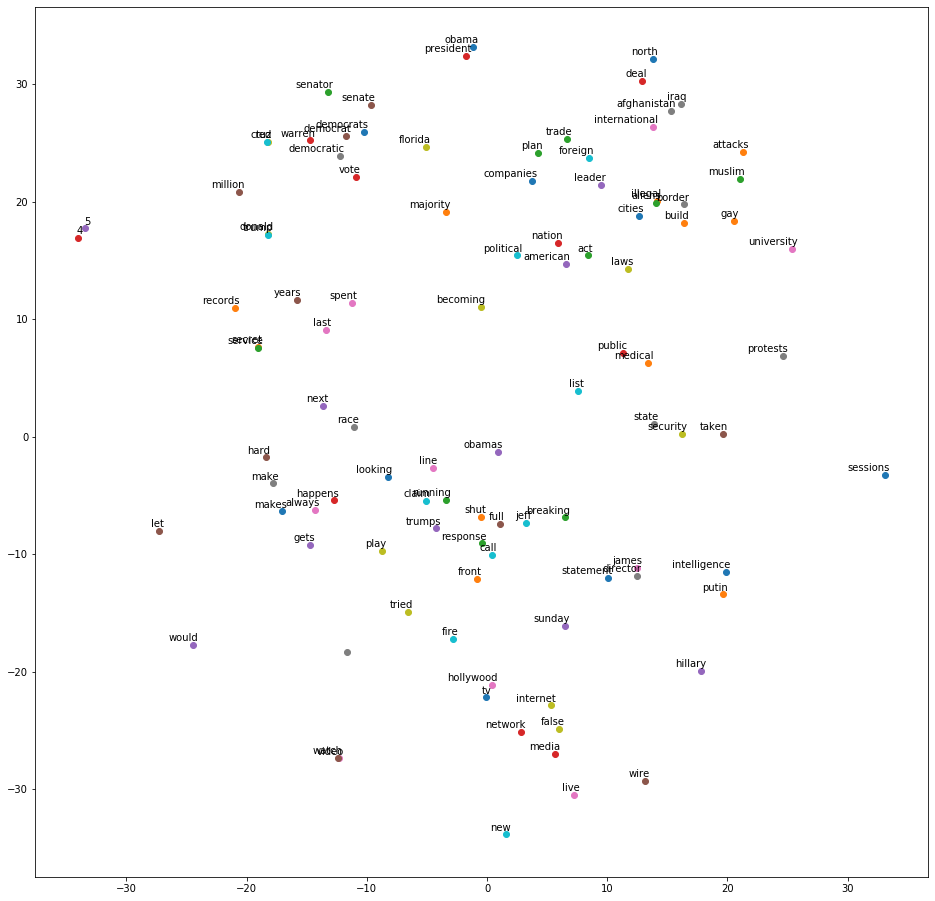

In [33]:
tsne_plot(model)


C:\Users\najee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


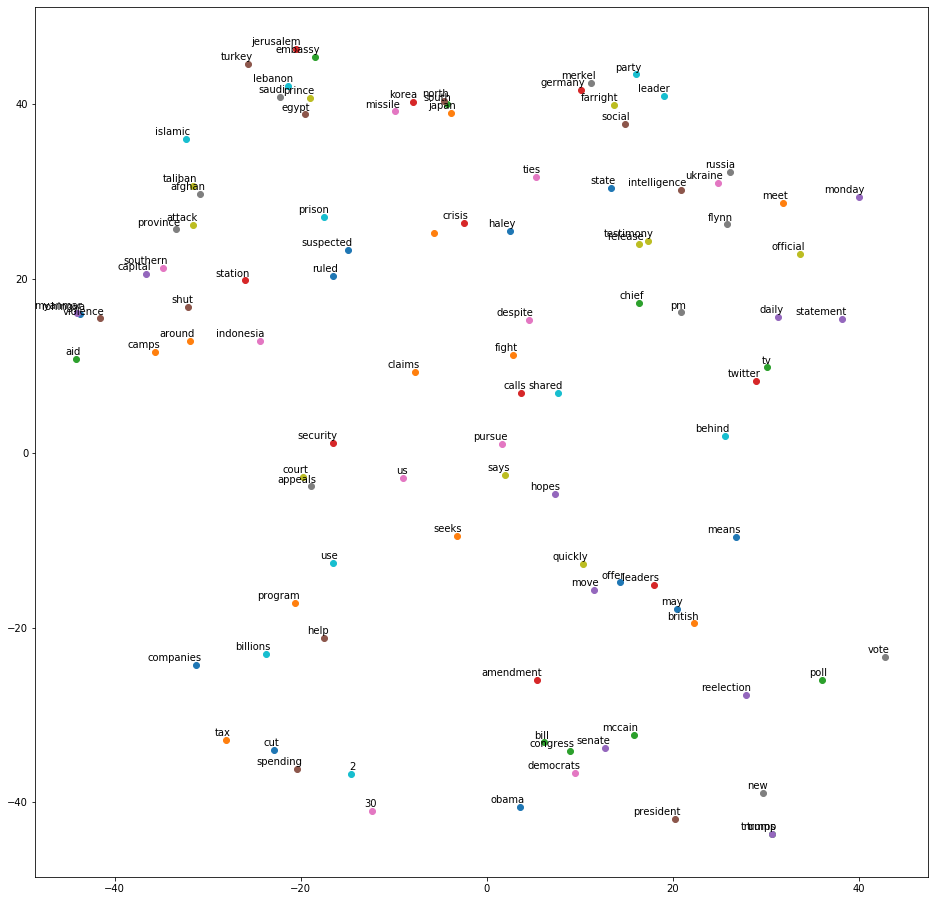

In [47]:
tsne_plot(model_true)

In [36]:
model.most_similar('trump')

C:\Users\najee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('donald', 0.747786283493042),
 ('repeatedly', 0.7032557725906372),
 ('presidency', 0.6512861251831055),
 ('trumps', 0.6391487121582031),
 ('course', 0.6379594802856445),
 ('ridiculous', 0.6284592151641846),
 ('considering', 0.6099283695220947),
 ('pence', 0.6072745323181152),
 ('totally', 0.6042409539222717),
 ('making', 0.5876823663711548)]

In [41]:
model

In [ ]:
def tsne_plot_changed(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i], y[i]),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')
        if i >100:
            break
    plt.show()